In [7]:
import pandas as pd
import numpy as np

In [8]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
frames = [nomes_f, nomes_m]
nomes = pd.concat(frames)['nome'].to_frame()


In [9]:
total_alunos = len(nomes)
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [10]:
!pip3 install html5lib
!pip3 install lxml

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [11]:
import html5lib

In [12]:
url = 'https://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos = cursos[0]
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})
cursos['id'] = cursos.index + 1
cursos = cursos.set_index('id')


In [13]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)


In [14]:
!pip3 install seaborn
import seaborn as sns

You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


C:\Users\Apis3\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

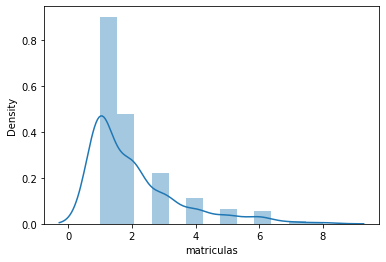

In [15]:
sns.distplot(nomes.matriculas)

In [16]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)


In [17]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso'])

In [18]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})


In [19]:
%pip install sqlalchemy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [20]:
from sqlalchemy import create_engine, MetaData, Table

engine = create_engine('sqlite:///:memory:')
query = 'select * from matriculas where quantidade_de_alunos < 20'
matriculas